# Exemplo de reamostragem das partículas

In [1]:
from random import randint, choice
import time
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import math
import random
from pf import Particle, draw_random_sample


import cv2

import sys
import os
os.getcwd() 
import sys
sys.path.append(os.getcwd())


import inspercles

import importlib

#importlib.reload(inspercles)


# Para suprimir alguns warnings do Matplotlib Inline
import warnings
warnings.simplefilter('ignore')
%matplotlib inline

Using scikit-learn to compute nearest neighbors


## Diretõrio de trabalho

In [2]:
!pwd

/home/borg/Documents/RobComp/particle


In [3]:
from PIL import Image as PilImage

color_image = cv2.imread("sparse_obstacles.png")
pil_image = color_image
np_image = cv2.cvtColor(color_image, cv2.COLOR_BGR2GRAY)

#color_image = PilImage.open("sparse_obstacles.png", 'r')
#pil_image = color_image.convert('1') # Converte a imagem PIL para Grayscale
#np_image = np.asarray(pil_image)

particle_size = 10

#import matplotlib_render as plotmap

back_color = "black"
colors     = ['red', 'green', 'cyan', 'yellow']
width, height = 775, 746

initial_pose = [200, 200, math.pi/8] # Posicao inicial considerada para o pf
inspercles.initial_pose = initial_pose
pose = [330, 220, math.radians(90)] # posicao "verdadeira" do robo 
inspercles.pose = pose
robot_radius=10   # Raio do robo
inspercles.robot_radius = robot_radius

# Os angulos em que o robo simulado vai ter sensores
angles = np.linspace(0.0, 2*math.pi, num=8)

particle_cloud = []

## Mapa com posição inicial

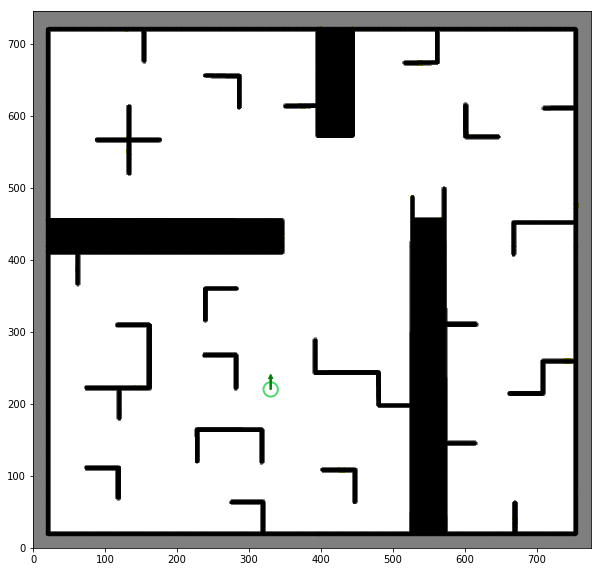

In [4]:
inspercles.nb_draw_map(color_image, pose=pose, robot=True)

A função *nb_initialize_particle_cloud()* pertence ao módulo <code>inspercles</code> e já faz uma primeira aleatorização das partículas

In [8]:
particulas = inspercles.nb_create_particles(pose = initial_pose, var_x = 100, var_y = 100,\
                                            var_theta = math.pi/2, num = 10)

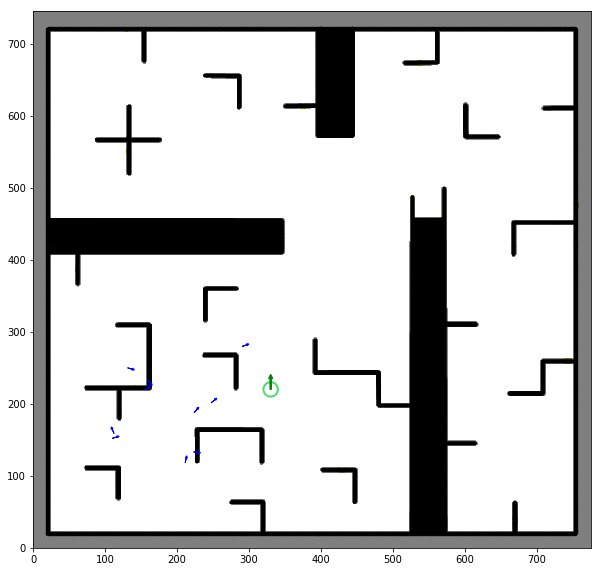

In [9]:
inspercles.nb_draw_map(color_image, particles = particulas, initial_position = initial_pose, pose=pose, robot=True);

Vamos tornar a distribuição das partículas desequilibrada para observarmos a reamostragem

In [10]:
particulas[0].w = 0.8   # a primeira recebe 80% da probabilidade
for i in range(1, 10):
    particulas[i].w = 0.2/9.0 # As subsequentes 1/9 do que sobrou (20%)

In [11]:
particulas_exp = [[p.x, p.y, p.theta] for p in particulas]
particulas_pesos = [p.w for p in particulas]

In [12]:
particulas_exp

[[211.26193149046367, 118.06724541944544, 1.3448986195307189],
 [158.9151861924416, 233.0680990868381, -0.8569710024519878],
 [222.8050530709297, 133.066051895108, -0.10145161147539183],
 [223.68734034283364, 187.81708937241868, 0.858035092156276],
 [247.4987795877829, 201.53492402844762, 0.6892904876092059],
 [131.14386060611744, 249.9842457303816, -0.2809564007342764],
 [290.45511794551555, 279.71177053871475, 0.3453034971803626],
 [110.08638249217148, 152.06357347895937, 0.29706592217944006],
 [112.43697161278179, 158.66749021340883, 1.9608506550313058],
 [154.8011140462229, 219.32379236227376, 0.5310036597216325]]

Vejam como está a distribuição dos pesos

In [13]:
particulas_pesos

[0.8,
 0.022222222222222223,
 0.022222222222222223,
 0.022222222222222223,
 0.022222222222222223,
 0.022222222222222223,
 0.022222222222222223,
 0.022222222222222223,
 0.022222222222222223,
 0.022222222222222223]

Vamos criar novas partículas reamostrando

In [14]:
novas_particulas = draw_random_sample(particulas, particulas_pesos, 10)

A probabilidade que está em peso perdeu o sentido. Precisamos fazer com que todos os pesos virem w=1

In [21]:
for p in novas_particulas:
    p.w = 1

O array *novas_particulas* contém as partículas depois da reamostragem. 

Vamos ver as partículas

Vamos observar os valores das partículas

In [22]:
valores_novas_particulas = [[p.x, p.y, p.theta] for p in novas_particulas]

Observem com a partícula que na geração anterior tinha $80\%$ de probabilidade é muito mais comum agora


<font color=red>Note que para o projeto a partícula precisa sofrer uma pequena mutação</font>

In [23]:
valores_novas_particulas

[[211.26193149046367, 118.06724541944544, 1.3448986195307189],
 [131.14386060611744, 249.9842457303816, -0.2809564007342764],
 [211.26193149046367, 118.06724541944544, 1.3448986195307189],
 [211.26193149046367, 118.06724541944544, 1.3448986195307189],
 [211.26193149046367, 118.06724541944544, 1.3448986195307189],
 [131.14386060611744, 249.9842457303816, -0.2809564007342764],
 [211.26193149046367, 118.06724541944544, 1.3448986195307189],
 [131.14386060611744, 249.9842457303816, -0.2809564007342764],
 [211.26193149046367, 118.06724541944544, 1.3448986195307189],
 [211.26193149046367, 118.06724541944544, 1.3448986195307189]]

![](animated.gif)